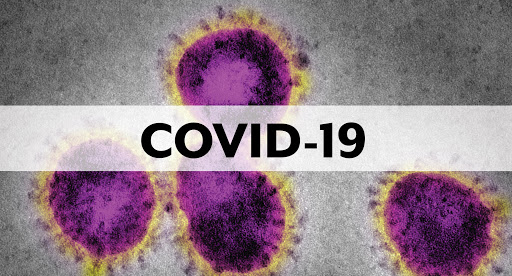

**Coronavirus disease 2019 (COVID-19)** is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).The disease was first identified in 2019 in Wuhan, China, and has since spread globally, resulting in the 2019–20 coronavirus pandemic.Recommended measures to prevent infection include frequent hand washing, maintaining distance from others (social distancing), and keeping hands away from the face. The use of masks is recommended for those who suspect they have the virus and their caregivers, but not the general public.There is no vaccine or specific antiviral treatment for COVID-19. Management involves treatment of symptoms, supportive care, isolation, and experimental measures.

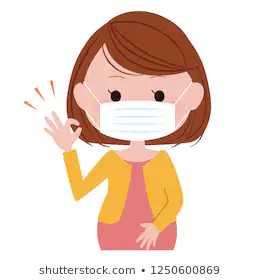

* [1.DataOverview](#1.DataOverview)
* [2.Visualization](#2.Visualization)
    * [2.1 Visualization for Country/Region](#21)
    * [2.2 Visualization for Province/State in China](#22)
    * [2.3 Visualization for Italy](#23)
    * [2.4 Visualization for patient in the world](#24)
    * [2.5 Visualization for Province/State in US](#25)

In [ ]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import datetime
import plotly.graph_objs as go
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [ ]:
os.listdir('../input/novel-corona-virus-2019-dataset')

# 1.DataOverview

The data size is 16729,and the variables include Observation Date,State,Region,and so on.We know that the disease was first identified in 2019 in Wuhan,China.According to this data,we can understand how fast the virus were spread in the world.In this note,I will do some data visualization and table to get some information about the COVID-19.If you have any advice or suggestion,welcome to give me some comments to improve the analysis.

In [ ]:
data=pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')
data['date']=data.ObservationDate.apply(lambda x:datetime.datetime.strptime(str(x),'%m/%d/%Y').strftime('%Y-%m-%d'))
data.head()

In [ ]:
data2=pd.read_csv('../input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv')
data2.head()

In [ ]:
data2=data2.dropna(subset=['wuhan(0)_not_wuhan(1)','latitude'])
data2=data2.fillna(value = {'sex' : 'Unknown', 'age' : 'Unknown'})
data2=data2.drop(index=data2[data2.sex=='4000'].index)
data2=data2.replace(to_replace = 'Female', value ='female')
data2=data2.replace(to_replace = 'Male', value ='male')
data2['label']=data2.apply(lambda x: ('age:'+str(x['age']),'sex:'+str(x['sex']),'geo_resolution:'+str(x['geo_resolution']),'Confirmed_date:'+str(x['date_confirmation'])),axis=1)
plt.figure(figsize=(10,10))
sns.barplot(x=data2.isnull().sum().sort_values(ascending=False),y=data2.isnull().sum().sort_values(ascending=False).index)
plt.title("counts of missing value for COVID19_open_line_list",size=20)

In [ ]:
print('The data size is',len(data))

# 2.Visualization

<h3 id="21">2.1&nbsp;Visualization&nbsp;for&nbsp;Country/Region</h3>

In [ ]:
formated_gdf = data.groupby(['date','Country/Region']).agg('sum')
formated_gdf = formated_gdf.reset_index()
formated_gdf=formated_gdf.drop(columns='SNo')


According to this table,not only in china,we know that the virus is getting serious in US.The people are confirmed up to 759086.Actually,there has a little weird information in this table,which is the number of  people are recovered in china.The are 77068 people have recovered,but the confirmed are only 82735.Compare to other country,the recovered rate is too high in china.

In [ ]:
Confirmed_last=data[data['date']==max(data['date'])].groupby(['Country/Region']).agg('sum').sort_values('Confirmed',ascending=False)[:10]
Confirmed_last=Confirmed_last.reset_index()
Confirmed_last=Confirmed_last.drop(columns='SNo')
Confirmed_last['Recovered rate']=Confirmed_last['Recovered']/Confirmed_last['Confirmed']
Confirmed_last.style.background_gradient(cmap='Blues')

In [ ]:
fig = go.Figure(data=[
    go.Line(name='Confirmed', x=formated_gdf[formated_gdf['Country/Region']=='Mainland China']['date'], y=formated_gdf[formated_gdf['Country/Region']=='Mainland China']['Confirmed']),
    go.Line(name='Deaths', x=formated_gdf[formated_gdf['Country/Region']=='Mainland China']['date'], y=formated_gdf[formated_gdf['Country/Region']=='Mainland China']['Deaths']),
    go.Line(name='Recovered', x=formated_gdf[formated_gdf['Country/Region']=='Mainland China']['date'], y=formated_gdf[formated_gdf['Country/Region']=='Mainland China']['Recovered']),
])

fig.update_layout(
    title="Number of Confirmed,Recovered,death in china for each day",
    xaxis_title="date",
    yaxis_title="People",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    ))
fig

In [ ]:
fig = go.Figure(data=[
    go.Line(name='Confirmed', x=formated_gdf[formated_gdf['Country/Region']=='Taiwan']['date'], y=formated_gdf[formated_gdf['Country/Region']=='Taiwan']['Confirmed']),
    go.Line(name='Deaths', x=formated_gdf[formated_gdf['Country/Region']=='Taiwan']['date'], y=formated_gdf[formated_gdf['Country/Region']=='Taiwan']['Deaths']),
    go.Line(name='Recovered', x=formated_gdf[formated_gdf['Country/Region']=='Taiwan']['date'], y=formated_gdf[formated_gdf['Country/Region']=='Taiwan']['Recovered']),
])

fig.update_layout(
    title="Number of Confirmed,Recovered,death in Taiwan for each day",
    xaxis_title="date",
    yaxis_title="People",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    ))
fig

In [ ]:
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2], 
                     projection="natural earth", animation_frame="date", 
                     title='Confirmed for each day')
fig.show()

In [ ]:
formated_gdf['size'] = formated_gdf['Deaths'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Deaths", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Deaths'])+2], 
                     projection="natural earth", animation_frame="date", 
                     title='Deaths for each day')
fig.show()

In [ ]:
formated_gdf['size'] = formated_gdf['Recovered'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Recovered", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Recovered'])+2], 
                     projection="natural earth", animation_frame="date", 
                     title='Recovered for each day')
fig.show()

<h3 id="22">2.2&nbsp;Visualization&nbsp;for&nbsp;Province/State&nbsp;in&nbsp;China</h3>

In [ ]:
china=data[data['Country/Region']=='Mainland China']
china= china.groupby(['date','Province/State'])['Confirmed', 'Deaths', 'Recovered'].max()
china = china.reset_index()
china.head()

In [ ]:
china['Province/State'].unique()

According to this table,you can know that the recovered rate is so high for each state in China.Actually,we can doubt about this information,but I think that there do not have too much problem  for other country so far.

In [ ]:
china_table=china[china['date']==max(china['date'])].sort_values('Confirmed',ascending=False)[:10]
china_table=china_table.drop(columns=['date'])
china_table['Recovered rate']=china_table['Recovered']/china_table['Confirmed']
china_table.style.background_gradient(cmap='Reds')

In [ ]:
colors = dict(zip(
    ['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang'],
    ['#800000', '#8B0000', '#A52A2A', '#B22222', '#DC143C', '#FF0000', '#FF6347','#FF7F50','#CD5C5C','#F08080',
    '#E9967A','#FA8072','#FFA07A','#FF4500','#FF8C00','#FFA500','#FFD700','#B8860B','#DAA520','#EEE8AA',
    '#BDB76B','#F0E68C','#808000','#FFFF00','#9ACD32','#556B2F','#6B8E23','#7CFC00','#7FFF00','#ADFF2F',
    '#006400']
))


def race_barchart(date):
    dff = china[china['date'].eq(date)].sort_values(by='Confirmed', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Province/State'], dff['Confirmed'], color=[colors[x] for x in dff['Province/State']],height=0.8)
    dx = dff['Confirmed'].max() / 200
    
    for i, (value, name) in enumerate(zip(dff['Confirmed'], dff['Province/State'])):
        ax.text(0, i,name+' ',size=16, weight=600, ha='right', va='center') 
        ax.text(value+dx, i,f'{value:,.0f}',  size=16, ha='left',  va='center') 
            
    ax.text(0.9, 0.2, date, transform=ax.transAxes, color='#777777', size=72, ha='right', weight=1000) 
    ax.text(0.59, 0.14, 'Total Confirmed:'+str(int(dff['Confirmed'].sum())), transform=ax.transAxes, size=24, color='#000000',ha='left')
    ax.tick_params(axis='x', colors='#777777', labelsize=12) 
    ax.xaxis.set_ticks_position('top') 
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-') 
    ax.text(0, 1.15, 'Confirmed for each date in China ',
                transform=ax.transAxes, size=24, weight=600, ha='left', va='top') 

    plt.box(False)
    

day = list(set(china.date.values))
day.sort()

fig, ax = plt.subplots(figsize=(16, 9))

HTML(animation.FuncAnimation(fig, race_barchart, frames=day).to_jshtml())

According to this chart,the confirmed people were between 2/12 and 2/13,increased about 10,000 people in Hubei.Because the rest of China is still using the results of lab tests to count confirmed cases, which is why the surge only appeared in Hubei.

The detail news:https://www.vox.com/2020/2/13/21136307/coronavirus-china-virus-hubei-cases

In [ ]:
fig = go.Figure(data=[
    go.Line(name='Confirmed', x=china[china['Province/State']=='Hubei']['date'], y=china[china['Province/State']=='Hubei']['Confirmed']),
    go.Line(name='Deaths', x=china[china['Province/State']=='Hubei']['date'], y=china[china['Province/State']=='Hubei']['Deaths']),
    go.Line(name='Recovered', x=china[china['Province/State']=='Hubei']['date'], y=china[china['Province/State']=='Hubei']['Recovered']),
])

fig.update_layout(
    title="Number of Confirmed,Recovered,death in Huibel for each day",
    xaxis_title="date",
    yaxis_title="People",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    ))
fig

<h3 id="23">2.3&nbsp;Visualization&nbsp;for&nbsp;Italy</h3>

In [ ]:
Italy=data[data['Country/Region']=='Italy']
Italy= Italy.groupby(['date'])['Confirmed', 'Deaths', 'Recovered'].max()
Italy = Italy.reset_index()
Italy.head()

In [ ]:
fig = go.Figure(data=[
    go.Line(name='Confirmed', x=Italy['date'], y=Italy['Confirmed']),
    go.Line(name='Deaths', x=Italy['date'], y=Italy['Deaths']),
    go.Line(name='Recovered', x=Italy['date'], y=Italy['Recovered']),
])

fig.update_layout(
    title="Number of Confirmed,Recovered,death in Italy for each day",
    xaxis_title="date",
    yaxis_title="People",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    ))
fig

<h3 id="24">2.4&nbsp;Visualization&nbsp;for&nbsp;patient&nbsp;in&nbsp;the&nbsp;world</h3>

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot(x=data2.sex.value_counts().sort_values(ascending=False),y=data2.sex.value_counts().sort_values(ascending=False).index,ax=ax[0])
ax[0].set_title("Number of patient by sex",size=20)
ax[0].set_xlabel('patient',size=18)
sns.barplot(x=data2.country.value_counts().sort_values(ascending=False),y=data2.country.value_counts().sort_values(ascending=False).index,ax=ax[1])
ax[1].set_title("Number of patient by country",size=20)
ax[1].set_xlabel('patient',size=18)

In [ ]:
incidents=folium.map.FeatureGroup()

Lat=data2.latitude.mean()
Lon=data2.longitude.mean()
from folium import plugins

map1=folium.Map([Lat,Lon],zoom_start=3)

COVID_map=plugins.MarkerCluster().add_to(map1)
for lat,lon,label in zip(data2.latitude,data2.longitude,data2.label):
    folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(COVID_map)
map1.add_child(COVID_map)
map1.save("COVID"+".html")

In [ ]:
HTML('<iframe src=COVID.html width=1000 height=450></iframe>')

<h3 id="25">2.5&nbsp;Visualization&nbsp;for&nbsp;Province/State&nbsp;in&nbsp;US</h3>

We know that Corona is getting serious in US.So I want to do some visualization to understand how fast the virus infected. According to this table,we know that the virus is the most serious in New York. 

In [ ]:
US=data[data['Country/Region']=='US']
US= US.groupby(['date','Province/State'])['Confirmed', 'Deaths', 'Recovered'].max()
US =US.reset_index()

US_table=US[US['date']==max(US['date'])].sort_values('Confirmed',ascending=False)[:10]
US_table=US_table.drop(columns=['date'])
US_table['Recovered rate']=US_table['Recovered']/US_table['Confirmed']
US_table.style.background_gradient(cmap='Purples')

In [ ]:
import random
random.seed( 199 )
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color
color_US=[]
for i in range(len(US['Province/State'].unique())):
    color_US.append(randomcolor())

In [ ]:
colors_US = dict(zip(
    US['Province/State'].unique(),
    color_US
))


def race_barchart_US(date):
    dff = US[US['date'].eq(date)].sort_values(by='Confirmed', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Province/State'], dff['Confirmed'], color=[colors_US[x] for x in dff['Province/State']],height=0.8)
    dx = dff['Confirmed'].max() / 200
    
    for i, (value, name) in enumerate(zip(dff['Confirmed'], dff['Province/State'])):
        ax.text(0, i,name+' ',size=16, weight=600, ha='right', va='center') 
        ax.text(value+dx, i,f'{value:,.0f}',  size=16, ha='left',  va='center') 
            
    ax.text(0.9, 0.2, date, transform=ax.transAxes, color='#777777', size=72, ha='right', weight=1000) 
    ax.text(0.59, 0.14, 'Total Confirmed:'+str(int(dff['Confirmed'].sum())), transform=ax.transAxes, size=24, color='#000000',ha='left')
    ax.tick_params(axis='x', colors='#777777', labelsize=12) 
    ax.xaxis.set_ticks_position('top') 
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-') 
    ax.text(0, 1.15, 'Confirmed for each date in US ',
                transform=ax.transAxes, size=24, weight=600, ha='left', va='top') 

    plt.box(False)
    

day = list(set(US.date.values))
day.sort()

fig, ax = plt.subplots(figsize=(16, 9))

HTML(animation.FuncAnimation(fig, race_barchart_US, frames=day,interval=400).to_jshtml())

According to this line chart,Corona is getting serious on 15th,March,2020.More and more people are confirmed.

In [ ]:
fig = go.Figure(data=[
    go.Line(name='Confirmed', x=formated_gdf[formated_gdf['Country/Region']=='US']['date'], y=formated_gdf[formated_gdf['Country/Region']=='US']['Confirmed']),
    go.Line(name='Deaths', x=formated_gdf[formated_gdf['Country/Region']=='US']['date'], y=formated_gdf[formated_gdf['Country/Region']=='US']['Deaths']),
    go.Line(name='Recovered', x=formated_gdf[formated_gdf['Country/Region']=='US']['date'], y=formated_gdf[formated_gdf['Country/Region']=='US']['Recovered']),
])

fig.update_layout(
    title="Number of Confirmed,Recovered,death in US for each day",
    xaxis_title="date",
    yaxis_title="People",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    ))
fig